# Summary

Objective:

- predict overal rating of healthcare provider

Methods Used:

- PCA
- Logistic Regression


# Part 1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [5]:
rating = pd.read_csv(r"C:\Users\mhime\Downloads\ProviderInfo.csv")

In [6]:
rating.head()

,PROVNUM,PROVNAME,ADDRESS,CITY,STATE,ZIP,PHONE,COUNTY_SSA,COUNTY_NAME,OWNERSHIP,...,CYCLE_2_REVISIT_SCORE,CYCLE_2_TOTAL_SCORE,WEIGHTED_ALL_CYCLES_SCORE,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT,FILEDATE
0,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653.0,2.563324e+09,290.0,Franklin,For profit - Individual,...,0,8,3.2,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-01
1,15010,COOSA VALLEY NURSING FACILITY,315 WEST HICKORY STREET,SYLACAUGA,AL,35150.0,2.562496e+09,600.0,Talladega,For profit - Corporation,...,0,16,28,0.0,0.0,1.0,15259.0,1.0,2.0,2018-07-01
2,15012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768.0,2.562184e+09,350.0,Jackson,Government - County,...,0,12,31.2,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-01
3,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206.0,2.058330e+09,360.0,Jefferson,For profit - Corporation,...,0,24,33.6,0.0,1.0,0.0,0.0,0.0,0.0,2018-07-01
4,15015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY P O BOX 97,MC CALLA,AL,35111.0,2.054776e+09,360.0,Jefferson,For profit - Corporation,...,0,24,19.2,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-01


a) keep only numeric data. Drop Phone and Country as well. Verify shape is 15617,28

In [15]:
rating = pd.DataFrame(rating._get_numeric_data())

In [16]:
rating.head()

,ZIP,PHONE,COUNTY_SSA,BEDCERT,RESTOT,OVERALL_RATING,SURVEY_RATING,QUALITY_RATING,STAFFING_RATING,RN_STAFFING_RATING,...,ADJ_AIDE,ADJ_LPN,ADJ_RN,ADJ_TOTAL,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT
0,35653.0,2.563324e+09,290.0,57.0,51.5,5.0,5.0,5.0,4.0,4.0,...,3.11741,1.24750,0.83853,5.13047,0.0,0.0,0.0,0.0,0.0,0.0
1,35150.0,2.562496e+09,600.0,85.0,74.2,3.0,3.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,15259.0,1.0,2.0
2,35768.0,2.562184e+09,350.0,50.0,NaN,1.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,35206.0,2.058330e+09,360.0,92.0,79.8,2.0,2.0,4.0,3.0,3.0,...,2.40074,0.86962,0.56463,3.83026,0.0,1.0,0.0,0.0,0.0,0.0
4,35111.0,2.054776e+09,360.0,103.0,98.1,3.0,3.0,4.0,3.0,2.0,...,2.55126,1.08955,0.30360,3.95709,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
rating = pd.DataFrame(rating.drop( ["PHONE","COUNTY_SSA"], axis=1))

In [20]:
rating.shape

(15617, 28)

Replace NaT values with np.nan. Then remove any rows that have an NaN value. Verify shape is updated to 14557,28

In [24]:
rating.isnull().sum()

ZIP                      1
BEDCERT                  1
RESTOT                 512
OVERALL_RATING         181
SURVEY_RATING          181
QUALITY_RATING         214
STAFFING_RATING        349
RN_STAFFING_RATING     349
AIDHRD                 947
VOCHRD                 947
RNHRD                  947
TOTLICHRD              947
TOTHRD                 947
PTHRD                  947
EXP_AIDE               947
EXP_LPN                947
EXP_RN                 947
EXP_TOTAL              947
ADJ_AIDE              1057
ADJ_LPN               1057
ADJ_RN                1057
ADJ_TOTAL             1057
INCIDENT_CNT             1
CMPLNT_CNT               1
FINE_CNT                 1
FINE_TOT                 1
PAYDEN_CNT               1
TOT_PENLTY_CNT           1
dtype: int64

In [25]:
rating.head()

,ZIP,BEDCERT,RESTOT,OVERALL_RATING,SURVEY_RATING,QUALITY_RATING,STAFFING_RATING,RN_STAFFING_RATING,AIDHRD,VOCHRD,...,ADJ_AIDE,ADJ_LPN,ADJ_RN,ADJ_TOTAL,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT
0,35653.0,57.0,51.5,5.0,5.0,5.0,4.0,4.0,3.43572,1.16495,...,3.11741,1.24750,0.83853,5.13047,0.0,0.0,0.0,0.0,0.0,0.0
1,35150.0,85.0,74.2,3.0,3.0,5.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,15259.0,1.0,2.0
2,35768.0,50.0,NaN,1.0,2.0,2.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,35206.0,92.0,79.8,2.0,2.0,4.0,3.0,3.0,2.32722,0.82104,...,2.40074,0.86962,0.56463,3.83026,0.0,1.0,0.0,0.0,0.0,0.0
4,35111.0,103.0,98.1,3.0,3.0,4.0,3.0,2.0,2.33617,0.92407,...,2.55126,1.08955,0.30360,3.95709,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
rating = rating.fillna(np.nan)

In [29]:
rating = rating.dropna(axis=0)

In [30]:
rating.shape

(14557, 28)

c) Split into train/test set using an 80/20 split

In [33]:
from sklearn.model_selection import train_test_split

In [50]:
X = rating.iloc[:, 0:3]

In [51]:
X

,ZIP,BEDCERT,RESTOT
0,35653.0,57.0,51.5
3,35206.0,92.0,79.8
4,35111.0,103.0,98.1
5,35611.0,149.0,119.7
6,36025.0,124.0,96.0
7,35045.0,201.0,136.6
8,35611.0,170.0,137.6
9,36092.0,121.0,112.9
10,35674.0,109.0,78.9
12,36535.0,154.0,122.3


In [52]:
X_other = rating.iloc[:, 4:29]

In [53]:
X_other

,SURVEY_RATING,QUALITY_RATING,STAFFING_RATING,RN_STAFFING_RATING,AIDHRD,VOCHRD,RNHRD,TOTLICHRD,TOTHRD,PTHRD,...,ADJ_AIDE,ADJ_LPN,ADJ_RN,ADJ_TOTAL,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT
0,5.0,5.0,4.0,4.0,3.43572,1.16495,0.66830,1.83325,5.26897,0.03204,...,3.11741,1.24750,0.83853,5.13047,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,4.0,3.0,3.0,2.32722,0.82104,0.52177,1.34281,3.67003,0.06629,...,2.40074,0.86962,0.56463,3.83026,0.0,1.0,0.0,0.0,0.0,0.0
4,3.0,4.0,3.0,2.0,2.33617,0.92407,0.23493,1.15900,3.49517,0.02236,...,2.55126,1.08955,0.30360,3.95709,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,5.0,4.0,3.0,2.57869,1.01443,0.41055,1.42498,4.00368,0.00000,...,2.56783,1.04823,0.46444,4.07866,0.0,1.0,0.0,0.0,0.0,0.0
6,4.0,5.0,3.0,4.0,1.99985,0.62768,0.59598,1.22366,3.22351,0.03624,...,2.12102,0.70311,0.75448,3.52979,1.0,1.0,0.0,0.0,0.0,0.0
7,2.0,3.0,5.0,5.0,2.64483,0.86299,0.72510,1.58808,4.23291,0.01318,...,2.48334,0.98515,0.93497,4.28916,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,3.0,3.0,2.0,2.66372,1.09313,0.32456,1.41769,4.08141,0.03518,...,2.53573,1.18122,0.38165,4.09048,0.0,0.0,0.0,0.0,0.0,0.0
9,3.0,5.0,1.0,1.0,2.39901,0.99975,0.19563,1.19538,3.59439,0.02979,...,2.38173,1.08929,0.26696,3.76695,0.0,0.0,0.0,0.0,0.0,0.0
10,4.0,2.0,4.0,5.0,1.58755,0.55164,0.97988,1.53152,3.11907,0.04787,...,1.84108,0.63870,1.26169,3.65833,0.0,0.0,0.0,0.0,0.0,0.0
12,2.0,5.0,4.0,5.0,1.94081,0.60088,0.80591,1.40680,3.34761,0.10114,...,2.08910,0.68041,0.99120,3.70024,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
X = pd.concat([X, X_other], axis = 1)

In [55]:
X.head()

,ZIP,BEDCERT,RESTOT,SURVEY_RATING,QUALITY_RATING,STAFFING_RATING,RN_STAFFING_RATING,AIDHRD,VOCHRD,RNHRD,...,ADJ_AIDE,ADJ_LPN,ADJ_RN,ADJ_TOTAL,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT
0,35653.0,57.0,51.5,5.0,5.0,4.0,4.0,3.43572,1.16495,0.66830,...,3.11741,1.24750,0.83853,5.13047,0.0,0.0,0.0,0.0,0.0,0.0
3,35206.0,92.0,79.8,2.0,4.0,3.0,3.0,2.32722,0.82104,0.52177,...,2.40074,0.86962,0.56463,3.83026,0.0,1.0,0.0,0.0,0.0,0.0
4,35111.0,103.0,98.1,3.0,4.0,3.0,2.0,2.33617,0.92407,0.23493,...,2.55126,1.08955,0.30360,3.95709,0.0,0.0,0.0,0.0,0.0,0.0
5,35611.0,149.0,119.7,3.0,5.0,4.0,3.0,2.57869,1.01443,0.41055,...,2.56783,1.04823,0.46444,4.07866,0.0,1.0,0.0,0.0,0.0,0.0
6,36025.0,124.0,96.0,4.0,5.0,3.0,4.0,1.99985,0.62768,0.59598,...,2.12102,0.70311,0.75448,3.52979,1.0,1.0,0.0,0.0,0.0,0.0


In [56]:
X =X.values

In [57]:
X

array([[  3.56530000e+04,   5.70000000e+01,   5.15000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.52060000e+04,   9.20000000e+01,   7.98000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.51110000e+04,   1.03000000e+02,   9.81000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  7.60510000e+04,   1.00000000e+02,   6.45000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.73960000e+04,   1.26000000e+02,   1.05200000e+02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.96020000e+04,   1.20000000e+02,   5.60000000e+01, ...,
          7.08650000e+04,   0.00000000e+00,   1.00000000e+00]])

In [37]:
y = rating['OVERALL_RATING'].values

In [58]:
y

array([ 5.,  2.,  3., ...,  5.,  3.,  1.])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

d) Scale X_train data properly. Do not scale target variable

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
X_train = scaler.transform(X_train)

In [80]:
X_test = scaler.transform(X_test)

# Part 2: Model #1: Logistic Regression

a) build a model to predict the OVERALL_RATING

In [67]:
from sklearn.linear_model import LogisticRegression

In [81]:
log_reg = LogisticRegression()

In [82]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
log_reg.classes_

array([ 1.,  2.,  3.,  4.,  5.])

In [84]:
log_reg.intercept_

array([-8.68259567, -2.265542  , -1.77085454, -1.3647723 , -6.27243581])

In [85]:
log_reg.coef_

array([[ -1.13518893e-01,   7.02130286e-02,   1.29125867e-02,
         -4.98280558e+00,  -2.34118239e+00,  -2.12168814e+00,
         -1.60447150e-01,  -1.57582413e-01,   3.49941866e-01,
          3.79608763e-01,   5.54273228e-01,   2.60712187e-01,
          8.24255620e-02,  -3.91634325e-02,   3.41021040e-03,
         -2.47685203e-01,  -1.11354936e-01,   2.06547294e-01,
         -5.34003331e-01,  -9.24341611e-01,  -5.47241437e-01,
         -2.27328537e-02,   1.09569427e-02,  -1.08099591e-02,
          2.00630873e-02,   6.33499633e-02,   1.40903165e-02],
       [  8.91993039e-03,   9.62922082e-02,  -1.26384961e-01,
         -1.92334424e+00,   1.28158838e-01,  -9.78124043e-02,
         -1.47188686e-01,  -5.21308913e-02,   3.85413379e-02,
         -5.90133097e-02,  -2.75047974e-02,  -4.88088055e-02,
         -5.64398630e-02,   7.73335825e-02,  -2.72113699e-02,
         -5.17298182e-02,   1.33007287e-02,  -5.73775073e-01,
         -3.20714544e-01,  -3.06160298e-01,   8.85268933e-01,
       

b) Calculate the score()

In [86]:
log_reg.score(X_train, y_train)

0.70596822670674109

c) Calculate the confusion matrix and classification report for the test data. 

In [87]:
from sklearn import metrics

In [88]:
y_pred = log_reg.predict(X_test)

In [91]:
print(metrics.confusion_matrix(y_test, y_pred))

[[244  64   0   0   0]
 [ 61 411  93  11   0]
 [  0 203  58 237   0]
 [  0  88  22 480 104]
 [  0   0   0  34 802]]


In [92]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        1.0       0.80      0.79      0.80       308
        2.0       0.54      0.71      0.61       576
        3.0       0.34      0.12      0.17       498
        4.0       0.63      0.69      0.66       694
        5.0       0.89      0.96      0.92       836

avg / total       0.65      0.69      0.66      2912



d) Do any of the classes get predicted exceptionally poortly? If so, comment on what might be causing this to happen

Class #3 was classified exceptionally poortly in this model. It's recall score is .12 (terrible in comparison to the others) indicating there are a lot of False Negatives in this class.  It also has a low recall score of .34 indicating there are a lot of False Positives in this class as well.  And finally this class has by far the lowest f1-score which further supports the weakness of the classifications for this class.  This class may contain instances with a large number of outliers in relation to the rest of the data.  There may be features within the dataset that are causing a missclassification across columns, and they should be removed through a dimensionality reduction technique.

In [108]:
threes = rating[rating.OVERALL_RATING==3.0]

In [109]:
threes.head()

,ZIP,BEDCERT,RESTOT,OVERALL_RATING,SURVEY_RATING,QUALITY_RATING,STAFFING_RATING,RN_STAFFING_RATING,AIDHRD,VOCHRD,...,ADJ_AIDE,ADJ_LPN,ADJ_RN,ADJ_TOTAL,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT
4,35111.0,103.0,98.1,3.0,3.0,4.0,3.0,2.0,2.33617,0.92407,...,2.55126,1.08955,0.30360,3.95709,0.0,0.0,0.0,0.0,0.0,0.0
7,35045.0,201.0,136.6,3.0,2.0,3.0,5.0,5.0,2.64483,0.86299,...,2.48334,0.98515,0.93497,4.28916,0.0,0.0,0.0,0.0,0.0,0.0
9,36092.0,121.0,112.9,3.0,3.0,5.0,1.0,1.0,2.39901,0.99975,...,2.38173,1.08929,0.26696,3.76695,0.0,0.0,0.0,0.0,0.0,0.0
13,35473.0,78.0,65.6,3.0,2.0,3.0,4.0,3.0,2.49571,1.02673,...,2.53732,1.12617,0.55214,4.19578,0.0,0.0,0.0,0.0,0.0,0.0
42,36607.0,164.0,131.1,3.0,2.0,5.0,3.0,3.0,2.33825,1.04111,...,2.27273,1.08955,0.51277,3.85593,0.0,1.0,1.0,17050.0,0.0,1.0


In [111]:
threes.describe()

,ZIP,BEDCERT,RESTOT,OVERALL_RATING,SURVEY_RATING,QUALITY_RATING,STAFFING_RATING,RN_STAFFING_RATING,AIDHRD,VOCHRD,...,ADJ_AIDE,ADJ_LPN,ADJ_RN,ADJ_TOTAL,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT
count,2393.000000,2393.000000,2393.000000,2393.0,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,...,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000
mean,49354.271208,112.748433,91.770706,3.0,2.538237,3.746344,2.914333,3.147931,2.208421,0.897755,...,2.224966,0.897947,0.586532,3.698747,1.222315,3.905140,0.399916,8524.736732,0.071458,0.471375
std,26177.819602,61.986130,54.755729,0.0,0.663410,1.215327,1.092204,1.213020,0.500241,0.352612,...,0.524585,0.325461,0.314951,0.709227,2.916030,5.373487,0.697667,29754.908573,0.279438,0.809716
min,792.000000,12.000000,8.400000,3.0,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.015670,1.505590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28759.000000,74.000000,56.200000,3.0,2.000000,3.000000,2.000000,2.000000,1.905260,0.686350,...,1.892470,0.693060,0.369790,3.256230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47553.000000,103.000000,83.800000,3.0,2.000000,4.000000,3.000000,3.000000,2.130800,0.885440,...,2.127160,0.891370,0.523100,3.589750,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,71653.000000,133.000000,112.300000,3.0,3.000000,5.000000,4.000000,4.000000,2.436320,1.076480,...,2.474020,1.083380,0.737200,4.026640,1.000000,5.000000,1.000000,3713.000000,0.000000,1.000000
max,99835.000000,874.000000,670.000000,3.0,5.000000,5.000000,5.000000,5.000000,5.206440,4.161770,...,5.673590,3.769320,2.628970,7.976110,33.000000,54.000000,6.000000,597392.000000,3.000000,7.000000


e) Calculate predictions for the training data & build the confusion matrix and classification report. Are there signs of overfitting? Why or why not

In [112]:
y_train_pred = log_reg.predict(X_train)

In [113]:
print(metrics.confusion_matrix(y_train, y_train_pred))

[[1105  284    2    0    0]
 [ 254 1681  336   51    0]
 [   1  737  327  830    0]
 [   0  373   43 1778  430]
 [   0    0    0   83 3330]]


In [114]:
print(metrics.classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

        1.0       0.81      0.79      0.80      1391
        2.0       0.55      0.72      0.62      2322
        3.0       0.46      0.17      0.25      1895
        4.0       0.65      0.68      0.66      2624
        5.0       0.89      0.98      0.93      3413

avg / total       0.69      0.71      0.68     11645



In [115]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        1.0       0.80      0.79      0.80       308
        2.0       0.54      0.71      0.61       576
        3.0       0.34      0.12      0.17       498
        4.0       0.63      0.69      0.66       694
        5.0       0.89      0.96      0.92       836

avg / total       0.65      0.69      0.66      2912



There are some signs of overfitting.  The accuracy scores for the training data are higher than the error scores for the test data, indicating there is low generalization of the model and possibly a high variance.  The Class #3 predictions are specifically overfit the most.

f) Print out an example of the predicted probability.  Use predict_proba()

In [120]:
log_reg.predict_proba(X_test[0:1,:])

array([[  9.51587491e-07,   6.56433644e-02,   1.06774578e-01,
          2.38947804e-01,   5.88633302e-01]])

# Part 3: Model #2: PCA(n_components =2) + Logistic Regression

a) transform the previously scaled X_train and X_test data using PCA(n_components =2).  Transform X_train and call it X_train_pca_2, transform X_test and call it X_test_pca_2

In [121]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA(n_components = 2)

In [128]:
X_train_pca_2 = pca.fit_transform(X_train)

In [129]:
X_test_pca_2 = pca.transform(X_test)

b) Use the transformed X_train_pca_2 to fit a Logistic Regression model

In [130]:
log_reg_pca = LogisticRegression()

In [131]:
log_reg_pca.fit(X_train_pca_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

c) calculate the confusion matrix and classification report for the test data

In [133]:
y_pca_pred_test = log_reg_pca.predict(X_test_pca_2)

In [134]:
print(metrics.confusion_matrix(y_test, y_pca_pred_test))

[[124 157   0   1  26]
 [ 95 255   0   1 225]
 [ 40 199   0   3 256]
 [ 24 175   0   4 491]
 [  9 114   0   2 711]]


In [135]:
print(metrics.classification_report(y_test, y_pca_pred_test))

             precision    recall  f1-score   support

        1.0       0.42      0.40      0.41       308
        2.0       0.28      0.44      0.35       576
        3.0       0.00      0.00      0.00       498
        4.0       0.36      0.01      0.01       694
        5.0       0.42      0.85      0.56       836

avg / total       0.31      0.38      0.28      2912



C:\Users\mhime\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


d) Calculate predictions for training data and build the confusion matrix and classification report. Are there signs of overfitting? Why or why not?

In [138]:
y_pca_pred_train = log_reg_pca.predict(X_train_pca_2)

In [139]:
print(metrics.confusion_matrix(y_train, y_pca_pred_train))

[[ 558  653    2    6  172]
 [ 411 1010    1    4  896]
 [ 168  780    1   15  931]
 [  91  628    0   12 1893]
 [  36  455    1   15 2906]]


In [141]:
print(metrics.classification_report(y_train, y_pca_pred_train))

             precision    recall  f1-score   support

        1.0       0.44      0.40      0.42      1391
        2.0       0.29      0.43      0.35      2322
        3.0       0.20      0.00      0.00      1895
        4.0       0.23      0.00      0.01      2624
        5.0       0.43      0.85      0.57      3413

avg / total       0.32      0.39      0.29     11645



Yes there are slight signs of overfitting the train data again, for the same reasons as before, Class #3 fits much better during training that in test and does not generalize well.

e) How well does this model perform relative to Model #1?  Explain why there is a shift in performance.

This model performs much worse than Model #1.  This is largely due to not keeping enough features during dimension reduction.  The metric below shows that the 2 principle compents that we kept (the top 2) only explained a total of 38% of overall variance of the dataset.  We need that number to be at or above 85% (as a rull of thumb).  More features and variance needs to be preserved during dimension reduction

In [142]:
pca.explained_variance_ratio_

array([ 0.23066637,  0.15045744])

# 4. Model #3: PCA(n_components=16) + Logistic Regression

a) Transform data from step one using 16 PCA components. Transform X_train and call it X_train_pca_16, transform X_test and call it X_test_pca_16

In [143]:
pca_16 = PCA(n_components=16)

In [145]:
X_train_pca_16 = pca_16.fit_transform(X_train)

In [146]:
X_test_pca_16 = pca_16.transform(X_test)

b) Use transformed data to fit a Logistic Regression Model

In [147]:
log_reg_pca_16 = LogisticRegression()

In [148]:
log_reg_pca_16.fit(X_train_pca_16, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

c) calculate the confusion matrix and classification report for the test data

In [150]:
y_pred_pca_test_16 = log_reg_pca_16.predict(X_test_pca_16)

In [151]:
print(metrics.confusion_matrix(y_test, y_pred_pca_test_16))

[[239  69   0   0   0]
 [ 61 416  86  13   0]
 [  0 202  58 238   0]
 [  0  86   7 482 119]
 [  0   0   0  31 805]]


In [152]:
print(metrics.classification_report(y_test, y_pred_pca_test_16))

             precision    recall  f1-score   support

        1.0       0.80      0.78      0.79       308
        2.0       0.54      0.72      0.62       576
        3.0       0.38      0.12      0.18       498
        4.0       0.63      0.69      0.66       694
        5.0       0.87      0.96      0.91       836

avg / total       0.66      0.69      0.66      2912



d) Calculate predictions for training data nad build the confusion matrix and classification report. Are there signs of overfitting? Why or why not?

In [153]:
y_pred_pca_train_16 = log_reg_pca_16.predict(X_train_pca_16)

In [154]:
print(metrics.confusion_matrix(y_train, y_pred_pca_train_16))

[[1087  303    1    0    0]
 [ 270 1682  317   53    0]
 [   1  747  294  853    0]
 [   0  381   20 1739  484]
 [   0    0    0   75 3338]]


In [155]:
print(metrics.classification_report(y_train, y_pred_pca_train_16))

             precision    recall  f1-score   support

        1.0       0.80      0.78      0.79      1391
        2.0       0.54      0.72      0.62      2322
        3.0       0.47      0.16      0.23      1895
        4.0       0.64      0.66      0.65      2624
        5.0       0.87      0.98      0.92      3413

avg / total       0.68      0.70      0.67     11645



Yes there are signs of overfitting for the exact same reasons as noted previously

#  5. Conceptual Questions

a) In order to better understand what is happening in Model 2 and 3, rerun PCA without specifying the number of components to keep.  Plot out the cumulative explained variance ratio vs number of components of the original scaled data. Describe what the plot is showing as well as what the cumulative explained variance tells us about our data

In [170]:
from sklearn.decomposition import PCA

In [171]:
PCA_ = PCA()

In [172]:
PCA_.fit(X_train, y_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [173]:
PCA_.explained_variance_ratio_

array([  2.30666371e-01,   1.50457441e-01,   1.21966015e-01,
         9.78020666e-02,   7.18591571e-02,   4.82422445e-02,
         4.07500734e-02,   3.73109441e-02,   3.17909544e-02,
         2.68589688e-02,   2.56410757e-02,   2.50610276e-02,
         2.22596881e-02,   2.16220900e-02,   1.83138446e-02,
         1.56598866e-02,   5.65060055e-03,   3.33882874e-03,
         2.60591311e-03,   1.41300467e-03,   4.90217442e-04,
         2.00036305e-04,   3.95502840e-05,   8.52391661e-12,
         1.28585774e-12,   6.22786609e-13,   4.54909205e-32])

In [174]:
import matplotlib.pyplot as plt

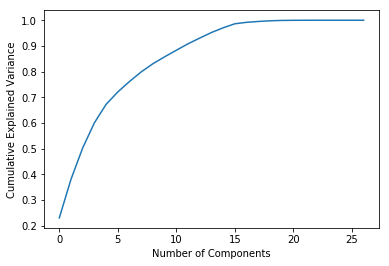

In [175]:
plt.plot(np.cumsum(PCA_.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [176]:
PCA_.explained_variance_ratio_.cumsum()

array([ 0.23066637,  0.38112381,  0.50308983,  0.60089189,  0.67275105,
        0.7209933 ,  0.76174337,  0.79905431,  0.83084527,  0.85770424,
        0.88334531,  0.90840634,  0.93066603,  0.95228812,  0.97060196,
        0.98626185,  0.99191245,  0.99525128,  0.99785719,  0.9992702 ,
        0.99976041,  0.99996045,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ])

The cumulative explained variance tells us how many principal components should be kept to preserve a certain amount of variance in the data.  This is a  dimensionality reduction technique that allows us to condense the data but still preserve high amounts of necessary information for training a model.

b) Between Model 2 and Model 3, which performed the best? Explain why this is?

Model #3 performed significantly better. The accuracy scores were significantly higher in Model #3 on the test data.  This means the model predicted a lower amount of false positives and false negatives.

c) Assuming you are working with a company on a modeling project with a massive data set, what would be some of the benefits of utilizing PCA?

- more computationally efficient
- faster performance
- less storage space needed
- similar to better accuracy & results 

d) Now argue the opposite of question 3, what is a negative result of utilizing this dimensionality reduction technique?

- some of the information within the data may be lost
- there may be other ways of dealing with sparseness that produce better results
- sometimes the threshold for necessary cumulative explained variance may be tough to decide on & take a lot of time fine-tuning

e) What does "one-vs-the rest" do within the sklearn multiclass logistic regression method?

In [185]:
log_reg.predict_proba(X_test[0:1,:])

array([[  9.51587491e-07,   6.56433644e-02,   1.06774578e-01,
          2.38947804e-01,   5.88633302e-01]])

Logistic regression is typically used in binary classification situations, but the one-vs-rest method involves computing a probability that an instance belongs to each of the classes.  The predict_proba() code shows the output of this.

f) Using Equation 4-14 plot out the logistic function and describe why it is useful in classification problems of the nature covered in this homework assignment

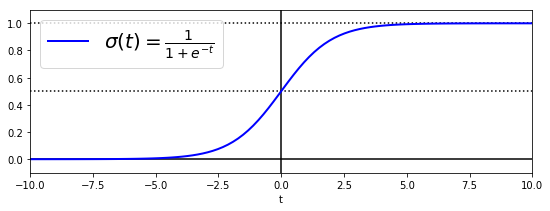

In [188]:
t = np.linspace(-10, 10, 100)
sig = 1/ (1+ np.exp(-t))
plt.figure(figsize= (9,3))
plt.plot([-10, 10], [0,0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10,10], [1,1], "k:")
plt.plot([0,0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label = r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc = "upper left", fontsize = 20)
plt.axis([-10,10,-0.1, 1.1])
plt.show()

This equation helps with classification problems by classifying instances based on their probability score.  If the probability score is above or below the desired decision boundary (0.5), the model can determine it's confidence that it belongs to a certain class.  This can be used in conjunction with cross entropy as a cost function within a model.  The objective is to have a model that estimates a high probability for the target class and low probability for the other classes.